# Signals whitening

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scipy.fft as fft
import scipy.signal as signal

In [2]:
# import signals
name = [ 'GW150914a',
        'GW150914',
        'GW150914b',
        'GW150914x',
        'GW150914c',
        'GW150914c1',
        'GW150914d',
        'GW150914e',
        'GW150914f',
        'GW150914g']

nSignals = len(name)

for n in name:
    exec(n + '= np.loadtxt("' + n + '.txt")')

lenght = eval(name[3]).size

print("Number of signals:", nSignals)
print("Signal sample size:", lenght)

Number of signals: 10
Signal sample size: 40000


In [3]:
# import sensitivity data
path = 'SensitivityData/'

L1_O3 = np.loadtxt(path + 'L1_O3.txt')
f_L3, s_L3 = L1_O3.T

print("Sensitivity sample size:", s_L3.size)

Sensitivity sample size: 19961


In [4]:
# time
time_step = 1/(2*5000)
t = np.arange(-4, 0, time_step)

# window function
w = signal.windows.tukey(lenght, alpha=0.25, sym=True)

# cutting window right edge
w1 = np.where(t > -1, 1, w)

# combining signals with window
h = [eval(n) * w1 for n in name]

In [5]:
# signals Fourier transforms (real) --> complex output
hf = [fft.rfft(h[i], norm="backward") for i in range(0, nSignals)]

# corresponding frequencies
delta_f = 1./(lenght * time_step)

f = delta_f * np.arange(0, lenght/2 + 1)

print(f"delta_f: {delta_f} Hz")
print(f[40], f[-1])
print("Frequency sample size:", f.size)

delta_f: 0.25 Hz
10.0 5000.0
Frequency sample size: 20001


In [6]:
# filtering

asd = np.concatenate((s_L3[0] * np.ones(40), s_L3))

# filtered signals
fil_sig = [ (hf[i])/asd for i in range(0, nSignals)]

print("Sensitivity sample new size:", len(asd))

Sensitivity sample new size: 20001


In [7]:
# import filtered signals in files

for i,n in zip(range(0,nSignals), name):
    np.savetxt('f_' + n + '.txt', np.real(fil_sig[i]), delimiter='\r')

In [8]:
# inverse Fourier transform

idft = [fft.irfft(fil_sig[i], norm="backward") for i in range(0, nSignals)]

print("Whitened signal sample in time domain size:", len(idft[0]))

Whitened signal sample in time domain size: 40000


In [9]:
# import whitened signals in files

for i,n in zip(range(0,nSignals), name):
    np.savetxt('w_' + n + '.txt', idft[i], delimiter='\r')

# SNR

In [10]:
# filtered signals PSD

psd = np.array([np.conjugate(fil_sig[i])*fil_sig[i]/len(fil_sig[i])**2 for i in range(0, nSignals)])

psd0 = np.array([np.conjugate(fil_sig[i])*fil_sig[i] for i in range(0, nSignals)])

In [11]:
snr = np.sqrt(np.real(4*np.sum(psd0, axis=1)*delta_f))

In [12]:
# import in file

np.savetxt("SNR.txt", np.sqrt(snr))

## Whitened signals plots

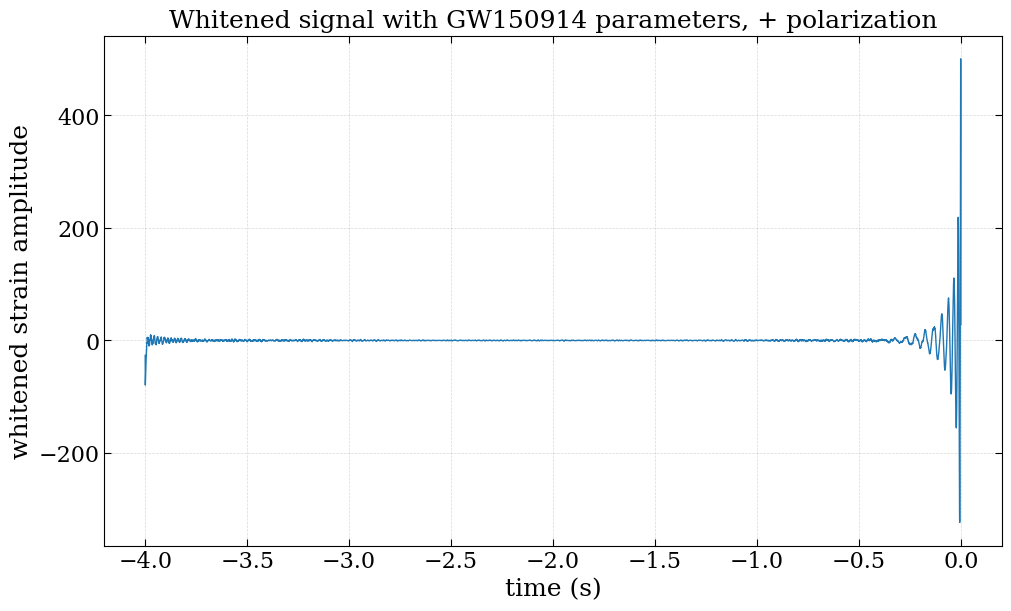

In [13]:
# plot

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, idft[1], color='tab:blue', linewidth=1)

# labels
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('whitened strain amplitude', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title("Whitened signal with GW150914 parameters, + polarization", fontdict={'fontfamily':'serif', 'fontsize':18})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# axis limits
# ax.set_xlim(-0.6, 0.1)
# ax.set_ylim(-550, 550)

plt.show()

# Filtered signal PSD plot

/Users/giuliadoda/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giuliadoda/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


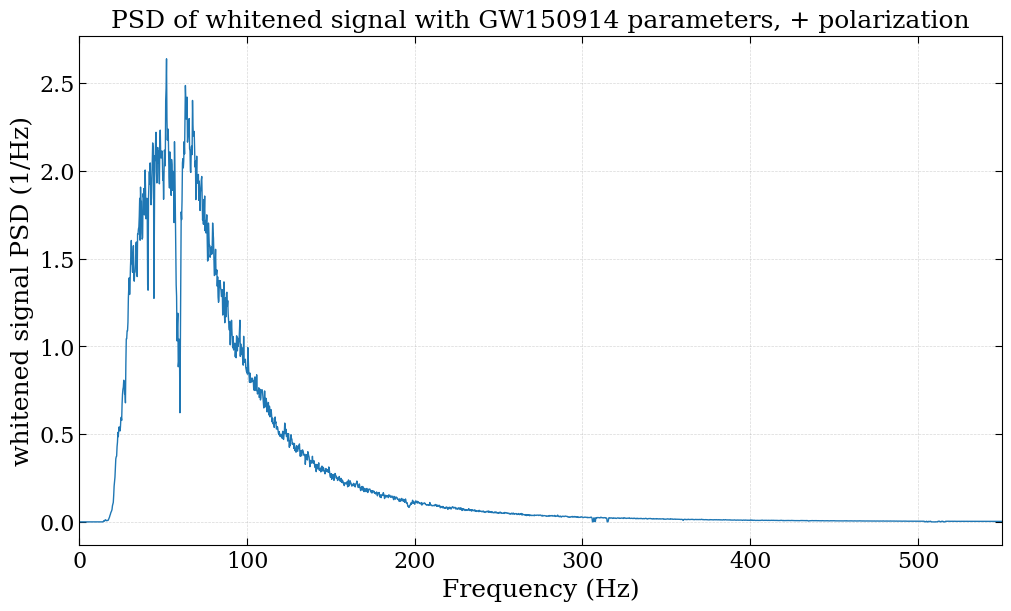

In [14]:
# plot

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(f, psd[1], color='tab:blue', linewidth=1)

# labels
ax.set_xlabel('Frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('whitened signal PSD (1/Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title('PSD of whitened signal with GW150914 parameters, + polarization', fontdict={'fontfamily':'serif', 'fontsize':18})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# axis limits
ax.set_xlim(0, 550)
# ax.set_ylim(-10000, 10000)

plt.show()